In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

warnings.simplefilter("ignore")


In [2]:
df = pd.read_csv('../data/INA_TweetsPPKM_Labeled.csv',sep='\t')
df.head()

,Date,User,Tweet,sentiment
0,2022-03-26 04:51:44+00:00,CendekiaDelapan,Karena stimulasi untuk #anakberkebutuhankhusus...,0
1,2022-03-25 10:13:26+00:00,AnantaElvano,Hadir Kembali Boss!! MEGA WIN Dari https://t.c...,1
2,2022-03-23 23:15:45+00:00,mitrafmpwt,Hayolohhhhhhhhh... seneng kannnn??\n\n#covid19...,1
3,2022-03-23 10:29:52+00:00,895jizfm,Thank You teman-teman dari #saganheritagehotel...,1
4,2022-03-22 17:25:29+00:00,ViantAntony,Ruwet Ruwet Ruwet inilah Negeri RuwetNesia. He...,1


In [3]:
df.shape

(5938, 4)

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.drop(columns=["date", "user"], axis=1, inplace=True, errors="ignore")


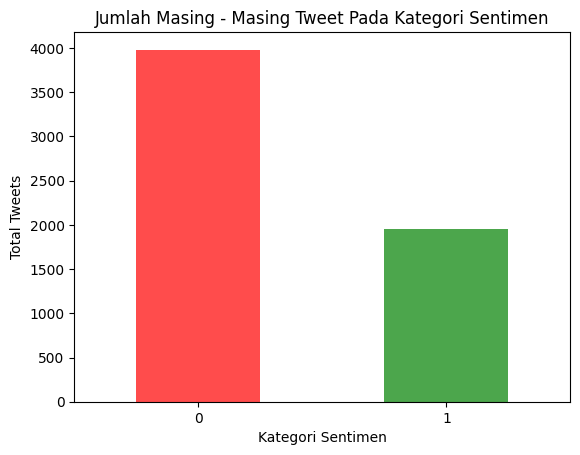

In [6]:
df_sentiment = df.groupby("sentiment")["sentiment"].count()

color_map = {0: "red", 1: "green"}
df_sentiment.plot(kind="bar", alpha=0.7, color=["red", "green"])
plt.xlabel("Kategori Sentimen")
plt.xticks(rotation=0)
plt.ylabel("Total Tweets")
plt.title("Jumlah Masing - Masing Tweet Pada Kategori Sentimen")
plt.show()


- _**casefolding**_


In [7]:
df['tweet'] = df['tweet'].apply(str.lower)

In [8]:
print('CaseFolding Result : ')
df.head()

CaseFolding Result : 


,tweet,sentiment
0,karena stimulasi untuk #anakberkebutuhankhusus...,0
1,hadir kembali boss!! mega win dari https://t.c...,1
2,hayolohhhhhhhhh... seneng kannnn??\n\n#covid19...,1
3,thank you teman-teman dari #saganheritagehotel...,1
4,ruwet ruwet ruwet inilah negeri ruwetnesia. he...,1


- ***tokenizing***

In [9]:
import string
import re
import nltk
from nltk.tokenize import word_tokenize
# from nltk.probability import FreqDist

In [10]:
def remove_special_char(text):
    # Menghapus karakter khusus seperti tab, baris baru, dan backslash
    text = (
        text.replace("\\t", " ")
        .replace("\\n", " ")
        .replace("\\u", " ")
        .replace("\\", "")
    )
    # Menghapus karakter non-ASCII seperti emotikon
    text = text.encode("ASCII", "replace").decode("ASCII")
    # Menghapus mention, link, dan hashtag
    text = " ".join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    # Menghapus URL yang tidak lengkap
    return text.replace("http://", " ").replace("https://", " ")


def remove_number(text):
    # Menghapus angka dari teks
    return re.sub(r"\d+", "", text)


def remove_punctuation(text):
    # Menghapus tanda baca dari teks
    return text.translate(str.maketrans("", "", string.punctuation))


def remove_whitespace(text):
    # Menghapus spasi di awal dan akhir teks
    return text.strip()


def remove_multiple_whitespace(text):
    # Menghapus multiple whitespace menjadi satu spasi
    return re.sub("\s+", " ", text)


def remove_single_char(text):
    # Menghapus kata yang terdiri dari satu karakter saja
    return re.sub(r"\b[a-zA-Z]\b", "", text)


def tokenize(text):
    # Melakukan tokenisasi kata pada teks menggunakan NLTK
    return word_tokenize(text)


In [11]:
# Mengaplikasikan fungsi remove_special_char pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_special_char)

# Mengaplikasikan fungsi remove_number pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_number)

# Mengaplikasikan fungsi remove_punctuation pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_punctuation)

# Mengaplikasikan fungsi remove_whitespace pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_whitespace)

# Mengaplikasikan fungsi remove_multiple_whitespace pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_multiple_whitespace)

# Mengaplikasikan fungsi remove_single_char pada kolom 'tweet'
df["tweet"] = df["tweet"].map(remove_single_char)

# Mengaplikasikan fungsi tokenize pada kolom 'tweet'
df["tweet"] = df["tweet"].map(tokenize)

# Menampilkan lima baris pertama dari DataFrame setelah dilakukan preprocessing teks
df.head()


,tweet,sentiment
0,"[karena, stimulasi, untuk, tidak, optimal, jik...",0
1,"[hadir, kembali, boss, mega, win, dari, jackpo...",1
2,"[hayolohhhhhhhhh, seneng, kannnn]",1
3,"[thank, you, temanteman, dari, udah, mampir, n...",1
4,"[ruwet, ruwet, ruwet, inilah, negeri, ruwetnes...",1


- ***stopwords removal***

In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()


In [13]:
def stopwords_removal(words):
    filtered_words = [word for word in words if word not in stopwords]
    return filtered_words


df["tweet"] = df["tweet"].map(stopwords_removal)
df.head()


,tweet,sentiment
0,"[stimulasi, optimal, dilakukan, online, memenu...",0
1,"[hadir, boss, mega, win, jackpot, jutaan, rupi...",1
2,"[hayolohhhhhhhhh, seneng, kannnn]",1
3,"[thank, you, temanteman, udah, mampir, ngobrol...",1
4,"[ruwet, ruwet, ruwet, inilah, negeri, ruwetnes...",1


- ***stemming***

In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [15]:
def stemming_words(words):
    return [stemmer.stem(word) for word in words]


df["tweet"] = df["tweet"].map(stemming_words)
df.head()


,tweet,sentiment
0,"[stimulasi, optimal, laku, online, penuh, butu...",0
1,"[hadir, boss, mega, win, jackpot, juta, rupiah...",1
2,"[hayolohhhhhhhhh, neng, kannnn]",1
3,"[thank, you, temanteman, udah, mampir, ngobrol...",1
4,"[ruwet, ruwet, ruwet, ini, negeri, ruwetnesia,...",1


In [17]:
data1 = "I'm designing a document and don't want to get bogged down in what the text actually says"
data2 = "I'm creating a template with various paragraph styles and need to see what they will look like."
data3 = "I'm trying to learn more about some feature of Microsoft Word and don't want to practice on a real document."

In [18]:
df1 = pd.DataFrame({'First_Para': [data1], 'Second_Para': [data2], 'Third_Para': [data2]})

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer()  # Specify the maximum number of features

In [23]:
tfidf_vectors = vectorizer.fit_transform(df['tweet'])

AttributeError: 'list' object has no attribute 'lower'